In [17]:
import pandas as pd#pandas
import numpy as np#numpy
import matplotlib.pyplot as plt
from sklearn import linear_model

In [18]:
import csv

# Define your data for house prices
data = [
    ['House Location', 'Rooms', 'Price'],
    ['New York', 3, 450000],
    ['Los Angeles', 4, 620000],
    ['Chicago', 2, 310000],
    ['Houston', 5, 530000]
]

# Write to a CSV file
with open('house_prices.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

In [19]:
df =pd.read_csv("house_prices.csv")
df

,House Location,Rooms,Price
0,New York,3,450000
1,Los Angeles,4,620000
2,Chicago,2,310000
3,Houston,5,530000


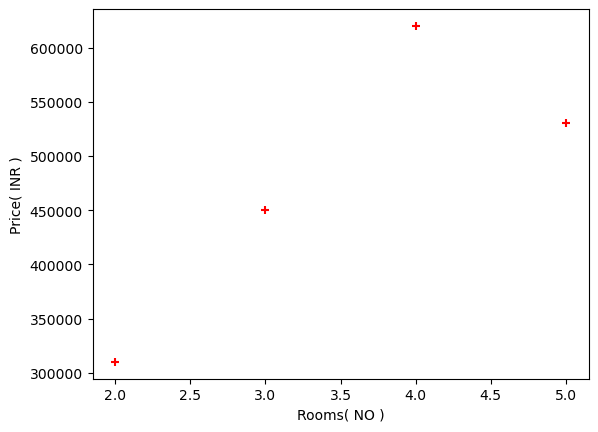

In [20]:
%matplotlib inline
plt.xlabel('Rooms( NO )')
plt.ylabel('Price( INR )')
plt.scatter(df.Rooms,df.Price,color='red',marker='+')

In [21]:
reg=linear_model.LinearRegression()
reg.fit(df[['Rooms']],df.Price)

LinearRegression()

In [22]:
reg.predict([[8]])

C:\Users\SHOVON HALDER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([851000.])

In [23]:
reg.coef_


array([83000.])

In [24]:
reg.intercept_

186999.99999999994

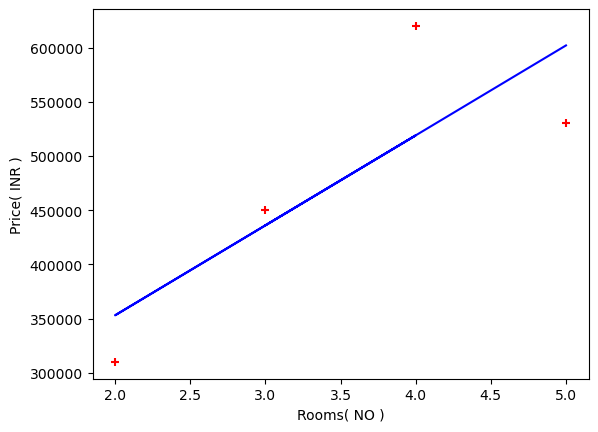

In [25]:
%matplotlib inline
plt.xlabel('Rooms( NO )')
plt.ylabel('Price( INR )')
plt.scatter(df.Rooms,df.Price,color='red',marker='+')
plt.plot(df.Rooms,reg.predict(df[['Rooms']]),color='blue')

In [26]:
import pandas as pd

# Sample data for Area
area_data = {
    'Area': [1200, 1500, 1800, 2000, 2500]  # Example areas in square feet
}

# Create a DataFrame
df_area = pd.DataFrame(area_data)

# Save the DataFrame to a CSV file
df_area.to_csv('area.csv', index=False)

print("CSV file with area data created successfully!")


CSV file with area data created successfully!


In [32]:
d=pd.read_csv('area.csv')
d.head(3)
d.rename(columns={'Area': 'Rooms'}, inplace=True)

In [33]:
p=reg.predict(d)
d['price']=p


array([9.97870e+07, 1.24687e+08, 1.49587e+08, 1.66187e+08, 2.07687e+08])

In [34]:
d.to_csv("prediction.csv",index=False)

In [55]:
df=pd.read_csv("home_price_prediction.csv")
df

,Location,Size (sq. ft.),Bedrooms,Price (in Local Currency)
0,Downtown,2000.0,3,500000
1,Suburb,1500.0,2,350000
2,Downtown,NaN,4,600000
3,Rural,1800.0,3,250000
4,Suburb,1700.0,3,400000
5,Downtown,2400.0,5,700000


In [66]:
import math

median_Size=math.floor(df['Size (sq. ft.)'].median())
median_Size



1800

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Location' column
df['Location'] = label_encoder.fit_transform(df['Location'])
reg = linear_model.LinearRegression()

# Fit the model
reg.fit(df[['Location', 'Size (sq. ft.)', 'Bedrooms']], df['Price (in Local Currency)'])


LinearRegression()

In [70]:
reg.coef_

array([-4.14664981e+04, -2.71807838e+01,  1.12831858e+05])

In [71]:
reg.intercept_

175853.3501896336

In [73]:
# Example new data point: 1800 sq. ft., 3 bedrooms, located in the Suburb (encoded as 1)
new_data = [[1, 1800, 3]]  # [Location (encoded), Size (sq. ft.), Bedrooms]


In [83]:
predicted_prices = reg.predict(new_data)
print(f"The predicted price for the given house is: {math.floor(predicted_prices[0])}")

The predicted price for the given house is: 423957


C:\Users\SHOVON HALDER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6 6


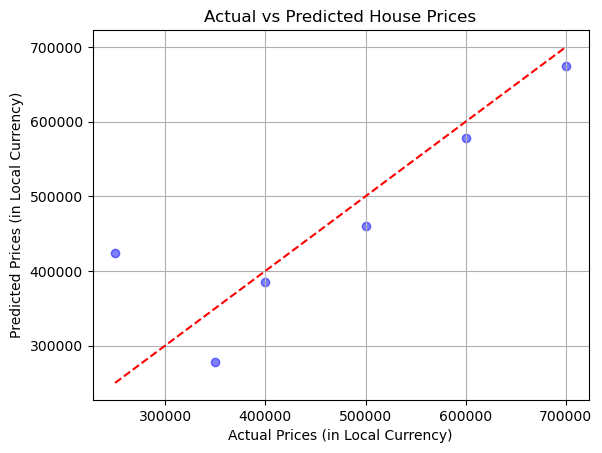

In [86]:
import matplotlib.pyplot as plt

# Ensure predicted_prices is computed based on the entire DataFrame
predicted_prices = reg.predict(df[['Location', 'Size (sq. ft.)', 'Bedrooms']])

# Check sizes
print(len(df['Price (in Local Currency)']), len(predicted_prices))

# Proceed with plotting

plt.scatter(df['Price (in Local Currency)'], predicted_prices, color='blue', alpha=0.5)
plt.plot([df['Price (in Local Currency)'].min(), df['Price (in Local Currency)'].max()], 
         [df['Price (in Local Currency)'].min(), df['Price (in Local Currency)'].max()], 
         color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices (in Local Currency)')
plt.ylabel('Predicted Prices (in Local Currency)')
plt.grid()
plt.show()
